In [2]:
from rdkit import Chem
from pathlib import Path
from rdkit.Chem import rdDepictor,Descriptors,rdMolDescriptors,rdMolEnumerator,Draw

In [9]:
def get_H_num(smi):#以列表形式统计H原子的总数和H同位素个数：[总数，氕，氘，氚]
    mol = Chem.MolFromSmiles(smi)
    H1=0
    for atom in mol.GetAtoms():
        H1 += atom.GetTotalNumHs()
    H2=smi.count('[2H]')
    H3=smi.count('[3H]')
    H_total= H1 + H2 + H3
    H_list=[H_total,H1,H2,H3]
    return H_list

def get_formula(mol,split=False):#输出化学计量数分子式，修复rdkit不能识别氢的同位素
    formula = rdMolDescriptors.CalcMolFormula(mol)
    smi = Chem.MolToSmiles(mol)
    H_list = get_H_num(smi)
    if H_list[2]>0 or H_list[3]>0:#判断是否含有氢的同位素
        formula_sub=formula.split('H',-1)
        print(formula_sub)
        for index,value in enumerate(formula_sub[1]):
            print(formula_sub[1])
            if value.isalpha():
                formula_sub[1]=formula_sub[1][index:]
                break
        #formula_sub.insert(1,)
        formula_sub.insert(1,'H'+str(H_list[1]))
        print(formula_sub)
        if H_list[2]>0:
            formula_sub.insert(2,'D'+str(H_list[2]))
            if H_list[3]>0:
                formula_sub.insert(3,'T'+str(H_list[3]))
        else:
            formula_sub.insert(2,'T'+str(H_list[3]))
        formula = ''.join(formula_sub)
    if split:#是否分割输出
        import re
        return re.findall(r'[0-9]+|[a-zA-Z]+',formula)
    else:
        return formula

In [4]:
mol1=Chem.MolFromSmiles('[2H]C1=C([2H])C(N2C(C([2H])=C([2H])C(C3=CC(C4=CC=CC=C4)=CC=C3C5=CC(C6=NC(C7=CC=CC=C7)=NC(C8=CC=CC=C8)=N6)=C(C9=C(C=CC=C9)O%10)C%10=C5)=C%11[2H])=C%11C%12=C2C([2H])=C([2H])C([2H])=C%12[2H])=C([2H])C([2H])=C1[2H]')

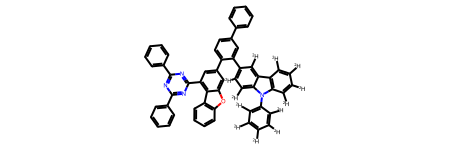

In [6]:
mol1

In [10]:
get_formula(mol1)

['C57', '36N4O']
36N4O
36N4O
36N4O
['C57', 'H24', 'N4O']


'C57H24D12N4O'

In [5]:
get_formula(mol1)

['C57', '36N4O']
36N4O
36N4O
36N4O
['C57', 'H', '24', 'N4O']


'C57H24D12N4O'

In [15]:
formula

'C57H24D12'

In [29]:
for file in Path.cwd().glob('*.mol'):###只会转换后缀为.mol的文件
    with open(file,'r') as f:
        lines=f.readlines()
        lines[3]=lines[3][0:len(lines[3])-30]+'0  0  0  0  0  0  0  0999 V2000\n'
        print(lines[3])
    with open(file,'w') as f:
        f.writelines(lines)
        f.close()

 63 66  0 0  0  0  0  0  0  0  0999 V2000


In [35]:
Path(Path.cwd(),'CCPU-3-F-P-MP2.mol')

In [38]:
s=Chem.MolFromMolFile(Path(Path.cwd(),'CCPU-3-F-P-MP2.mol').as_posix())

In [39]:
s

In [28]:
s[0:len(s)-3]

'0123'